<a href="https://colab.research.google.com/github/binliu0630/TimeSeries/blob/main/TimeSeries_HoltWinter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

#read the data file. the date column is expected to be in the mm-dd-yyyy format.
df = pd.read_csv('https://gist.githubusercontent.com/sachinsdate/40b07da727f8d3d2476dbef4a2f06b6a/raw/d44d7b5ea8737bce28ba29a40df57db2ecccbadf/retail_sales_used_car_dealers_us_1992_2020.csv', 
                 header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])


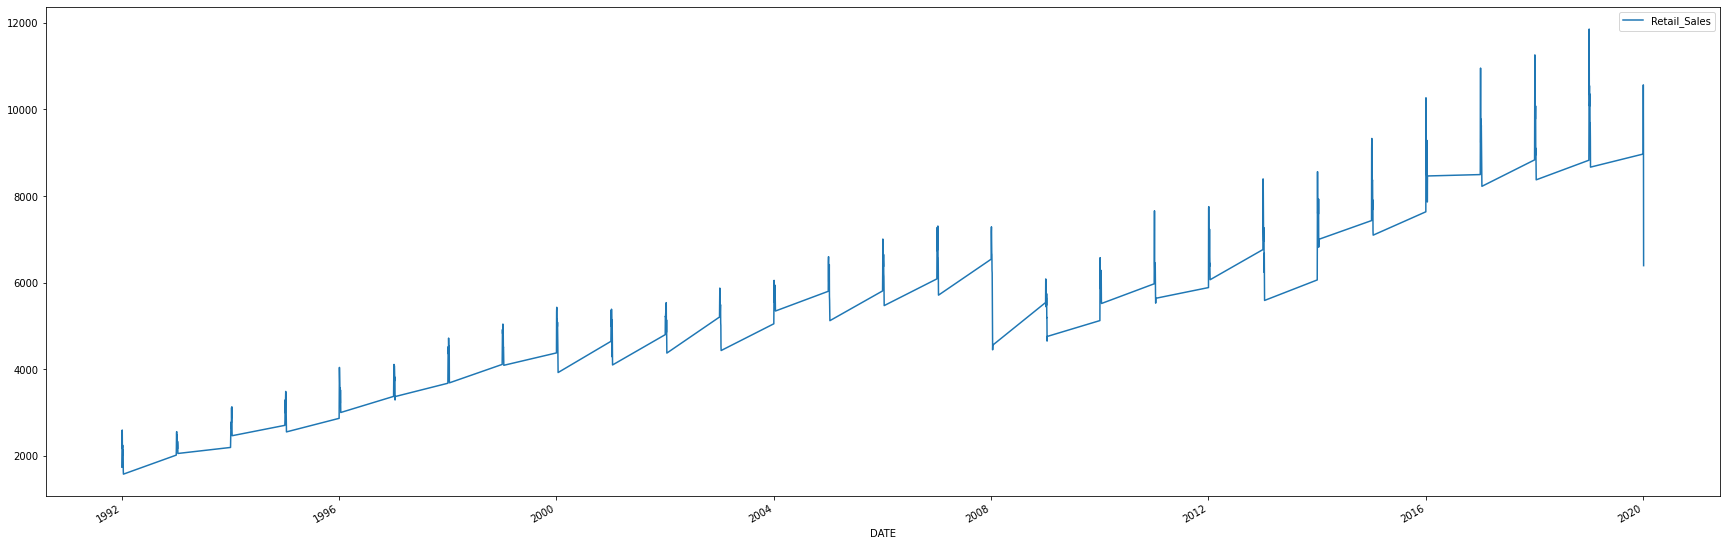

In [9]:
#plot the data
df.plot.line(figsize=(30,10), fontsize=10)
plt.show()

In [10]:
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

#build and train the model on the training data
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

#print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23246797.460
Optimized:                         True   AIC                           3695.322
Trend:                         Additive   BIC                           3756.010
Seasonal:                Multiplicative   AICC                          3697.535
Seasonal Periods:                    12   Date:                 Thu, 26 Aug 2021
Box-Cox:                          False   Time:                         20:53:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3891170                alpha                 True
smoothing_slope          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


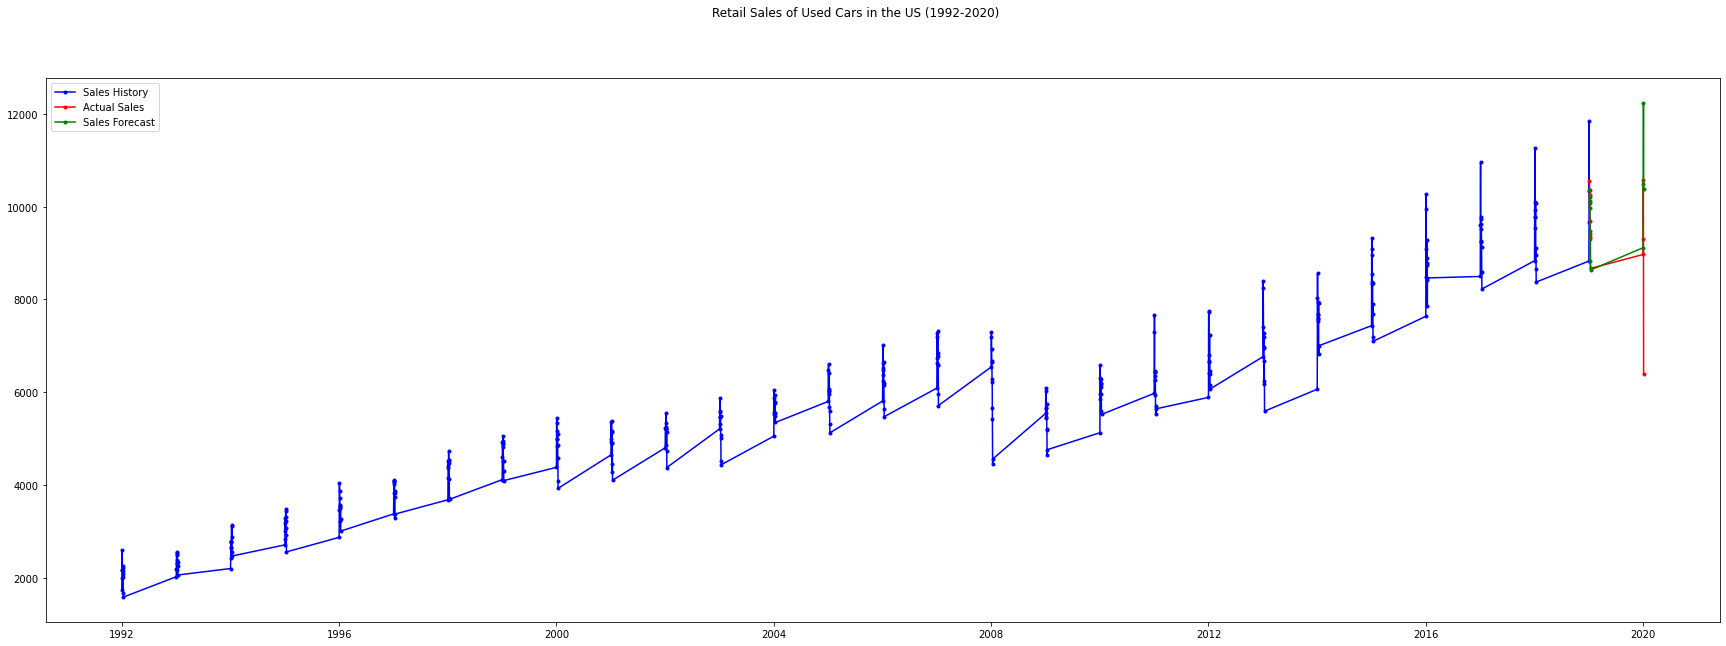

In [14]:


#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast = fitted.forecast(steps=12)

#plot the training data, the test data and the forecast on the same plot
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')

past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()